<a href="https://colab.research.google.com/github/thsdornelas/colab_script/blob/main/stats_pivo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Gráfico apresentando as estatísticas de pivô na bacia do São Marcos**

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
path = '/content/drive/MyDrive/dados_doutorado/Stats_Pivos.xlsx'

pivos = pd.read_excel(path, nrows = 3) # Lê as três primeiras linhas da planilha
pivos

,NM_POLO,1985,1990,2000,2005,2010,2014,2017,2019,2022
0,Alto Paracatu / Entre Ribeiros,28,167,441,622,708,1239,1523,1814,2104
1,Alto Rio Preto,5,20,94,142,175,246,285,338,361
2,São Marcos,2,41,405,701,874,1164,1313,1384,1595


In [66]:
sao_marcos = pivos[pivos['NM_POLO'] == 'São Marcos'] # Seleciona a bacia de São Marcos apenas
sao_marcos

,NM_POLO,1985,1990,2000,2005,2010,2014,2017,2019,2022
2,São Marcos,2,41,405,701,874,1164,1313,1384,1595


In [87]:
# Deleta a primeira coluna
df = sao_marcos.drop(sao_marcos.columns[[0,9]], axis=1) # Deleta as colunas de 0 e 9
#df

In [88]:
# Transpondo a linha de São Marcos
transposed_marcos = df.transpose()
transposed_marcos = transposed_marcos.rename(columns={2: 'NR_PIVOS'}) # Renomeando a coluna
transposed_marcos.index.name = 'ANO'
transposed_marcos

,NR_PIVOS
ANO,
1985,2
1990,41
2000,405
2005,701
2010,874
2014,1164
2017,1313
2019,1384


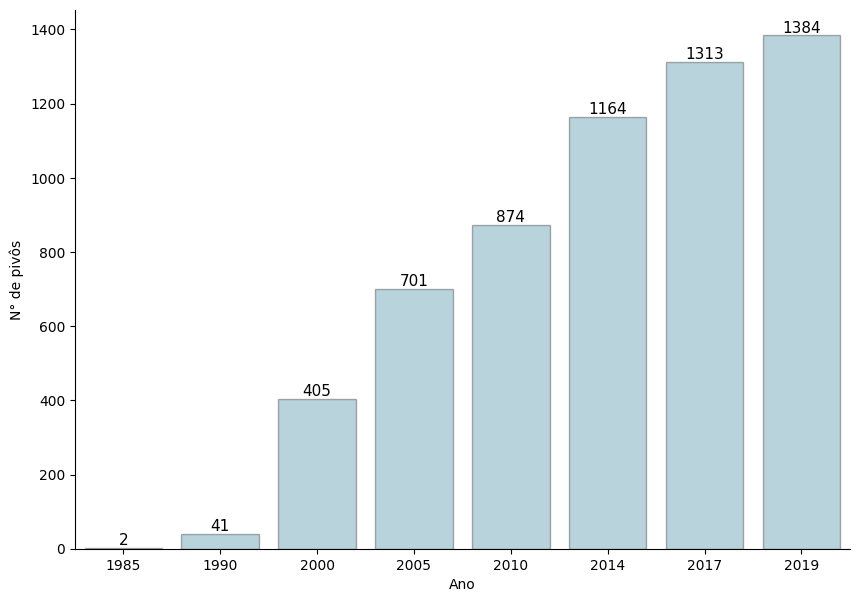

In [89]:
plt.figure(figsize=(10,7))
ax = sns.barplot(
    transposed_marcos, x='ANO', y='NR_PIVOS',
    estimator='sum', color='#027BA5', saturation=0.7, alpha=0.3, edgecolor='black'
)
sns.despine() #Mantem apenas as axis inferior e esquerda
ax.bar_label(ax.containers[0], fontsize=11) # Adicionar os rótulos
ax.set_xlabel('Ano')
ax.set_ylabel('N° de pivôs')
plt.savefig('/content/drive/MyDrive/dados_doutorado/grafico_pivos_ate19.jpg', dpi=100)